**Document Technique : Construire un Modèle de Machine Learning de Base**

**Session 2 : Live Coding Session by GNDC**

---

### **Introduction à la Session**

Bienvenue à la deuxième session de notre Live Coding : « Construire un Modèle de Machine Learning de Base ». Cette session est conçue pour vous initier aux concepts fondamentaux du Machine Learning (ML) et vous guider dans la construction d’un modèle simple de prédiction en utilisant Python. Vous apprendrez à manipuler des outils essentiels tout en découvrant des étapes pratiques pour la création d’un modèle prédictif.

---

### **Objectifs de la Session**
- Comprendre les bases du Machine Learning.
- Découvrir l’utilisation des bibliothèques Python pour le ML.
- Créer et évaluer un modèle de prédiction simple.
- Appliquer vos connaissances à des problèmes réels, notamment la prédiction des prix des produits agricoles.

---

### **Prérequis Techniques**
Pour une expérience optimale, veuillez installer les outils suivants avant la session :

#### 1. **Python**
- Version recommandée : 3.8 ou supérieure.
- [Lien de téléchargement](https://www.python.org/downloads/)

#### 2. **Environnement de développement**
- IDE : Visual Studio Code, PyCharm ou Jupyter Notebook.
- Installer Jupyter Notebook :
  ```bash
  pip install notebook
  ```

#### 3. **Bibliothèques Python**
Veuillez installer les bibliothèques suivantes avant la session :
  ```bash
  pip install numpy pandas matplotlib scikit-learn joblib openpyxl
  ```

---

### **Plan de la Session**

#### 1. **Introduction au Machine Learning**
- Définition et importance.
- Types de Machine Learning : supervisé, non-supervisé et par renforcement.
- Aperçu des étapes clés : collecte des données, préparation, modélisation, évaluation et déploiement.

#### 2. **Exploration des Données**
- Importation des données avec Pandas.
- Nettoyage et analyse exploratoire des données (EDA).
- Exemple de données : Dataset des prix des produits agricoles.

#### 3. **Construction du Modèle**
- Préparation des données pour les modèles.
- Comparaison de quatre modèles : Linear Regression, Decision Tree, Random Forest, Gradient Boosting.
- Visualisation des performances des modèles.

#### 4. **Evaluation du Modèle**
- Calcul des performances : erreur quadratique moyenne (MSE), coefficient de détermination (R²).
- Interprétation des résultats.

#### 5. **Conclusion et Q&A**
- Discussion des applications réelles du modèle construit.
- Suggestions pour aller plus loin.
---

In [1]:
# Bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Charger les données à partir d'un fichier Excel
file_path = "ecocrops_dataset.xlsx"
data = pd.read_excel(file_path)

In [3]:
# Afficher les premières lignes des données
print(data.head())

      Zone     Product     Month  Price  Year
0  TIGNERE  Corn grain   January    111  2020
1  TIGNERE  Corn grain  February    122  2020
2  TIGNERE  Corn grain     March    133  2020
3  TIGNERE  Corn grain     April    144  2020
4  TIGNERE  Corn grain       May    144  2020


In [4]:
# Affichage des informations sur le dataset
print("Info sur le dataset:")
print(data.info())

Info sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Zone     5184 non-null   object
 1   Product  5184 non-null   object
 2   Month    5184 non-null   object
 3   Price    5184 non-null   int64 
 4   Year     5184 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 202.6+ KB
None


In [5]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
print(data.describe())


Statistiques descriptives:
              Price         Year
count   5184.000000  5184.000000
mean     488.080826  2020.131944
std      729.472071     0.496515
min        0.000000  2020.000000
25%      194.000000  2020.000000
50%      333.000000  2020.000000
75%      500.000000  2020.000000
max    12000.000000  2022.000000


In [6]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes:")
print(data.isnull().sum())


Valeurs manquantes:
Zone       0
Product    0
Month      0
Price      0
Year       0
dtype: int64


In [8]:
# Encoder les variables catégoriques
label_encoders = {}
categorical_columns = ['Zone', 'Product', 'Month']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column + '_Encoded'] = label_encoders[column].fit_transform(data[column])

In [9]:
# Sélectionner les colonnes pertinentes pour le modèle
X = data[['Zone_Encoded', 'Product_Encoded', 'Month_Encoded', 'Year']]
y = data['Price']

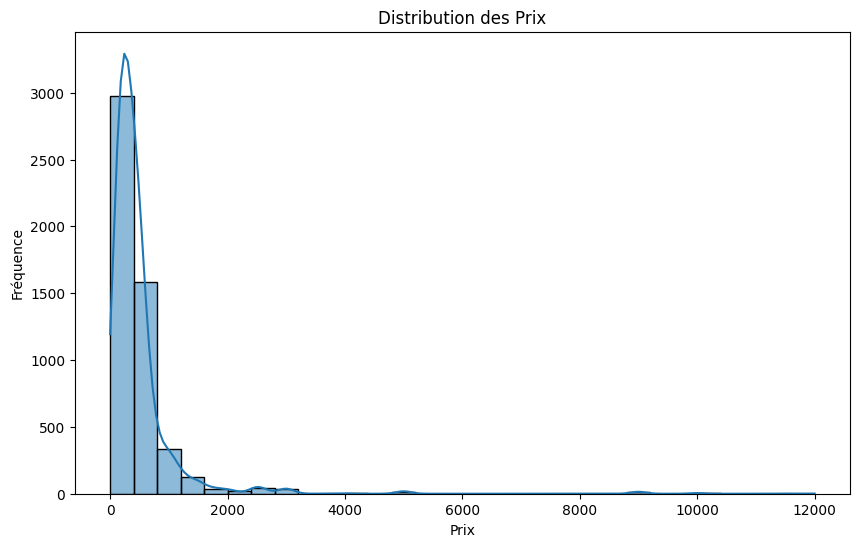

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

In [12]:
# Statistiques de la distribution
print("Statistiques des prix:")
print(f"Moyenne: {data['Price'].mean():.2f}")
print(f"Médiane: {data['Price'].median():.2f}")
print(f"Écart-type: {data['Price'].std():.2f}")
print(f"Skewness: {data['Price'].skew():.2f}")

Statistiques des prix:
Moyenne: 488.08
Médiane: 333.00
Écart-type: 729.47
Skewness: 8.11


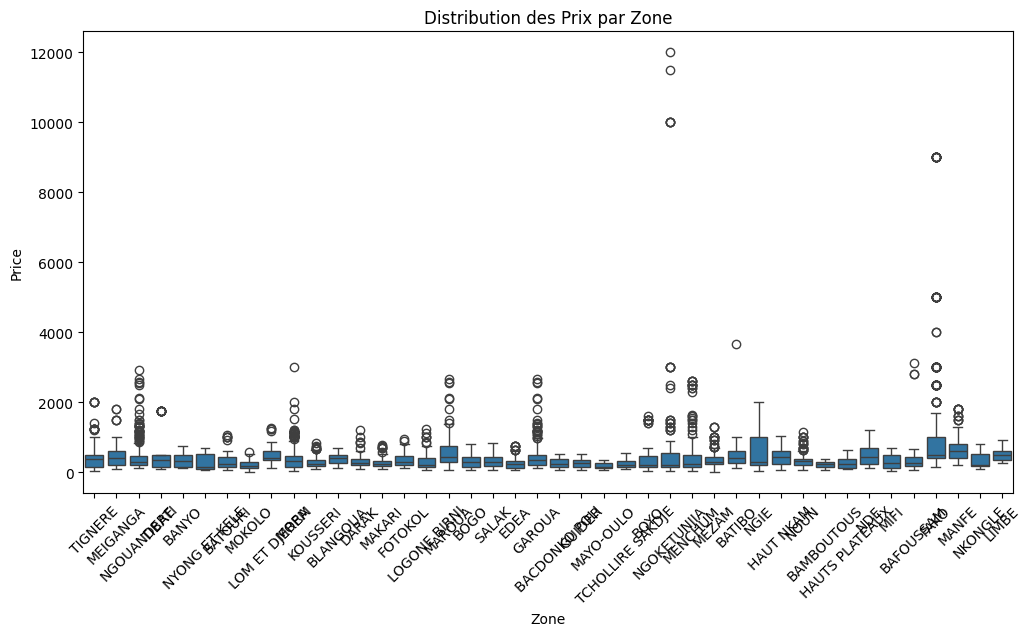

In [13]:
# Prix moyen par zone
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y='Price', data=data)
plt.title('Distribution des Prix par Zone')
plt.xticks(rotation=45)
plt.show()

C:\Users\TOUZA ISAAC\AppData\Local\Temp\ipykernel_36608\2735119461.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product', y='Price', data=data, ci=None)


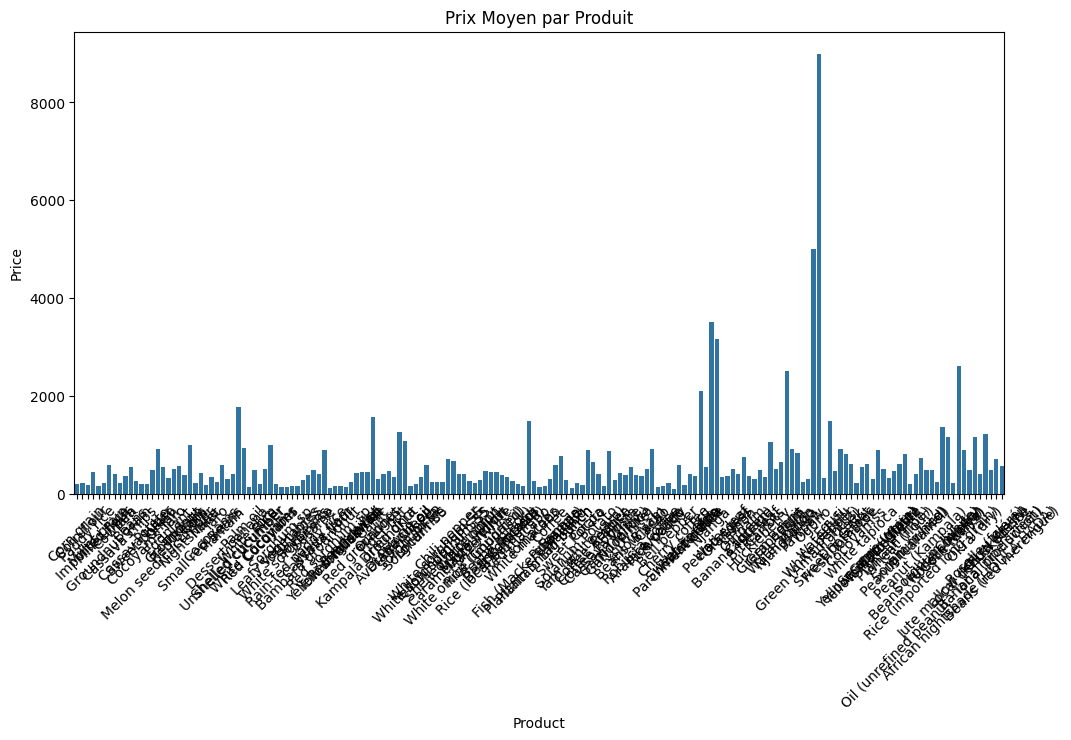

In [14]:
# Prix moyen par produit
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Price', data=data, ci=None)
plt.title('Prix Moyen par Produit')
plt.xticks(rotation=45)
plt.show()

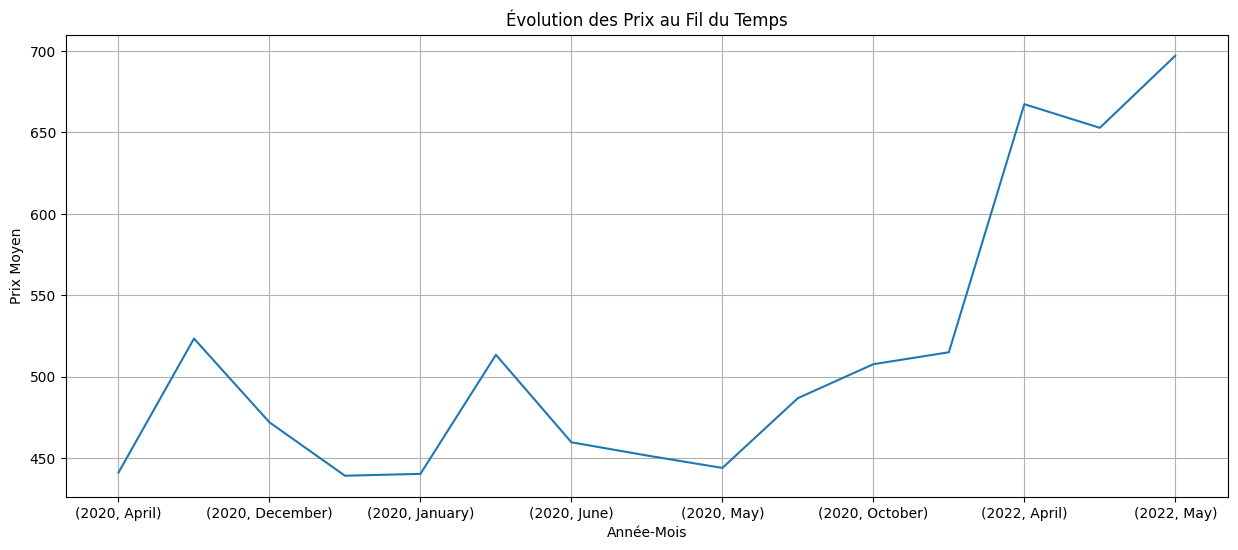

In [15]:
# Évolution des prix dans le temps
plt.figure(figsize=(15, 6))
data.groupby(['Year', 'Month'])['Price'].mean().plot(kind='line')
plt.title('Évolution des Prix au Fil du Temps')
plt.xlabel('Année-Mois')
plt.ylabel('Prix Moyen')
plt.grid(True)
plt.show()

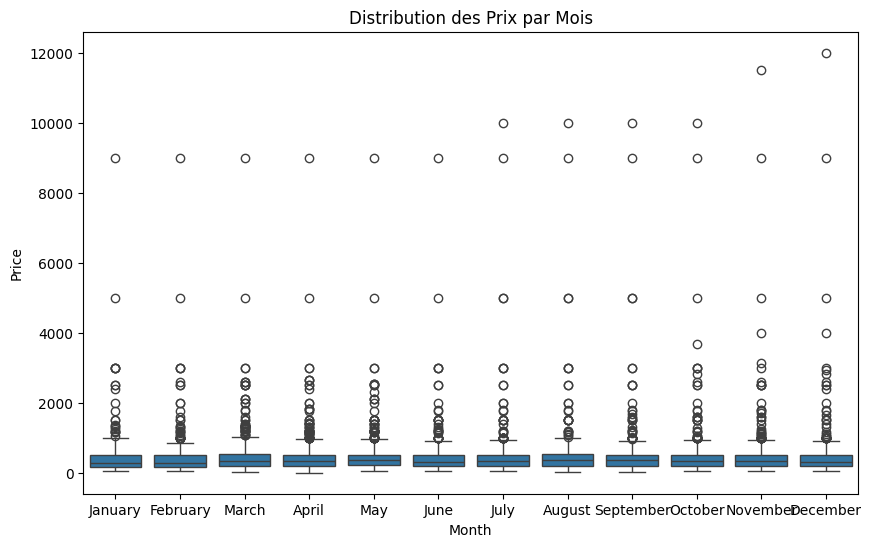

In [16]:
# Saisonnalité des prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Price', data=data)
plt.title('Distribution des Prix par Mois')
plt.show()

In [17]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire les prix
    predictions = model.predict(X_test)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    
    results[name] = {'MSE': mse, 'R²': r2}

    # Afficher les résultats
    print(f"{name} Model:")
    print(f"  - MSE: {mse}")
    print(f"  - R²: {r2}")

# Visualiser les performances
model_names = list(results.keys())
mse_values = [results[name]['MSE'] for name in model_names]
r2_values = [results[name]['R²'] for name in model_names]

Linear Regression Model:
  - MSE: 481529.8974617179
  - R²: 0.009562658101552657
Decision Tree Model:
  - MSE: 119260.23240115719
  - R²: 0.754698953904552
Random Forest Model:
  - MSE: 94404.43216548806
  - R²: 0.805823739397507
Gradient Boosting Model:
  - MSE: 89783.21144085408
  - R²: 0.8153289219312589


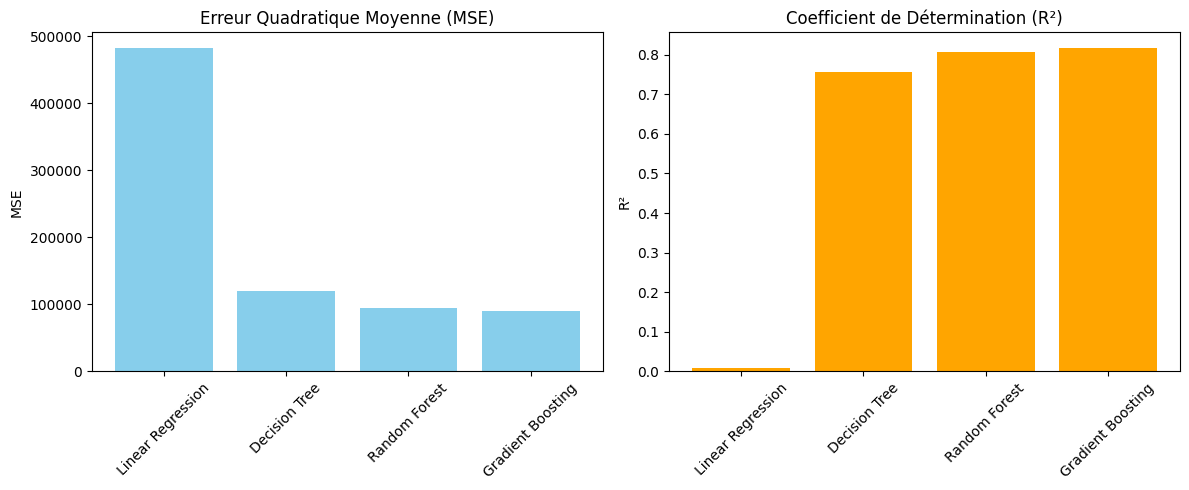

In [20]:

plt.figure(figsize=(12, 5))

# Graphique MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Erreur Quadratique Moyenne (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Graphique R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='orange')
plt.title('Coefficient de Détermination (R²)')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

### **Linear Regression Model**  
- **MSE** : 481,529.90, correspondant à une erreur moyenne (RMSE) de **694 CFA**.  
- Cette erreur est très élevée, indiquant que le modèle ne parvient pas à prédire les prix de manière fiable. Avec un \( R^2 \) de **0.96%**, il explique à peine les variations des prix agricoles. Ce modèle est donc inadéquat pour des applications pratiques.

---

### **Decision Tree Model**  
- **MSE** : 119,260.23, correspondant à une erreur moyenne (RMSE) de **345 CFA**.  
- Ce modèle offre des prédictions beaucoup plus précises, représentant une erreur de **5% à 10%** des prix moyens. Avec un \( R^2 \) de **75.5%**, il capture efficacement les variations des prix agricoles. Cependant, sa performance pourrait encore être améliorée pour les données complexes.

---

### **Random Forest Model**  
- **MSE** : 94,404.43, correspondant à une erreur moyenne (RMSE) de **307 CFA**.  
- Ce modèle est performant, avec une erreur représentant environ **3% à 8%** des prix moyens. Avec un \( R^2 \) de **80.6%**, il montre une excellente capacité à prédire les variations des prix tout en minimisant l'erreur. Il est adapté à des applications pratiques telles que la fixation des prix ou l’optimisation des stratégies commerciales.

---

### **Gradient Boosting Model**  
- **MSE** : 89,783.21, correspondant à une erreur moyenne (RMSE) de **299 CFA**.  
- Avec une erreur qui représente environ **3% à 8%** des prix moyens, ce modèle est le plus performant. Un \( R^2 \) de **81.5%** montre qu’il capture avec précision les variations des prix, tout en maintenant un excellent équilibre entre précision et fiabilité. Ce modèle est recommandé pour des prédictions précises et des analyses stratégiques.

---

### **Conclusion**  
- Les modèles **Random Forest** et **Gradient Boosting** sont les plus adaptés pour prédire les prix de vente des produits agricoles avec une marge d'erreur raisonnable (**environ 3% à 8% des prix moyens**).  
- Ces modèles peuvent être utilisés pour prendre des décisions importantes telles que la planification des ventes, la négociation des prix ou l’optimisation des revenus.  


Le **coefficient de détermination (\(R^2\))** est une mesure statistique qui évalue la proportion de la variance totale d'une variable dépendante (\(y\), par exemple les prix agricoles) qui est expliquée par le modèle. Plus \(R^2\) est élevé, plus le modèle est performant pour expliquer les variations des données.

- **Signification de \(R^2\)** :
  - \(R^2\) indique la part des variations de \(y\) expliquée par le modèle en fonction des variables indépendantes (\(X\), comme la zone, l'année, ... ).
  - Par exemple, un \(R^2 = 0.81\) (81 %) signifie que **81 % des variations des prix agricoles** sont expliquées par le modèle, et seulement 19 % sont dues à d'autres facteurs ou à des erreurs.  

- **Implication pratique** :
  - Un modèle avec un \(R^2\) élevé capture mieux les relations entre les variables. Cela signifie qu'il est capable de généraliser sur des données similaires (comme prévoir les prix des produits non encore vendus avec précision).

---


In [21]:
# Sélectionner le modèle avec le plus haut R²
best_model_name = max(results, key=lambda name: results[name]['R²'])
best_model = models[best_model_name]

# Sauvegarder le modèle et les encoders
export = {
    'model': best_model,
    'label_encoders': label_encoders
}
joblib.dump(export, 'best_price_prediction_model.joblib')
print(f"Meilleur modèle ({best_model_name}) exporté avec succès !")

Meilleur modèle (Gradient Boosting) exporté avec succès !


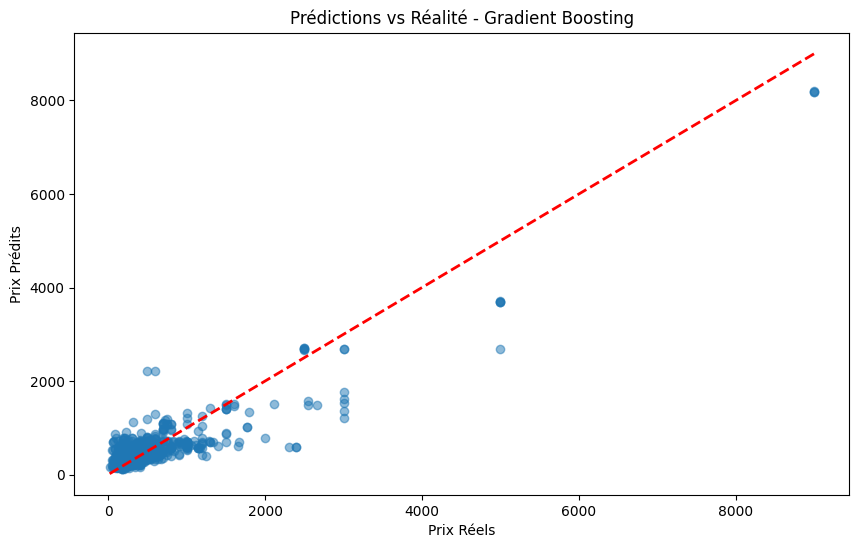

In [22]:
# Prédictions vs Réalité pour le meilleur modèle
best_model_name = max(results, key=lambda x: results[x]['R²'])
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réels')
plt.ylabel('Prix Prédits')
plt.title(f'Prédictions vs Réalité - {best_model_name}')
plt.show()

In [27]:
def predict_price(zone, product, month, year):
    # Encoder les variables catégoriques
    zone_encoded = label_encoders['Zone'].transform([zone])
    product_encoded = label_encoders['Product'].transform([product])
    month_encoded = label_encoders['Month'].transform([month])
    
    # Créer le tableau des caractéristiques
    features = np.array([[zone_encoded[0], product_encoded[0], month_encoded[0], year]])
    
    # Effectuer la prédiction
    predicted_price = best_model.predict(features)
    
    # Retourner la prédiction
    return predicted_price[0]


In [29]:
# Définir les cas de test
test_cases = [
    {'Zone': 'MORA', 'Product': 'Rice', 'Month': 'April', 'Year': 2024},
    {'Zone': 'GAROUA', 'Product': 'Tomatoes', 'Month': 'February', 'Year': 2023},
    {'Zone': 'LIMBE', 'Product': 'Corn', 'Month': 'September', 'Year': 2022},
    {'Zone': 'BAFOUSSAM', 'Product': 'Banana', 'Month': 'December', 'Year': 2024},
]

# Effectuer les prédictions et stocker les résultats
results = []
for case in test_cases:
    try:
        prix_pred = predict_price(case['Zone'], case['Product'], case['Month'], case['Year'])
        results.append({
            'Zone': case['Zone'],
            'Product': case['Product'],
            'Month': case['Month'],
            'Year': case['Year'],
            'Price Predicted (FCFA/kg)': round(prix_pred, 2)
        })
    except ValueError as e:
        results.append({
            'Zone': case['Zone'],
            'Product': case['Product'],
            'Month': case['Month'],
            'Year': case['Year'],
            'Price Predicted (FCFA/kg)': str(e)
        })

# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results)

# Afficher le DataFrame
#print(df_results)
df_results

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


,Zone,Product,Month,Year,Price Predicted (FCFA/kg)
0,MORA,Rice,April,2024,605.95
1,GAROUA,Tomatoes,February,2023,397.88
2,LIMBE,Corn,September,2022,460.47
3,BAFOUSSAM,Banana,December,2024,561.83
